In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv'
df = pd.read_csv(url, sep = ',')

In [ ]:
df_n = df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).sum().reset_index()
df_n.head()

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Survived', x = 'Sex', hue = 'Pclass', data = df_n)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Survived', x = 'Sex', hue = 'Pclass', data = df_n)
plt.title("Cantidad de sobrevivientes según sexo y tipo de clase", 
             fontsize = 20, fontweight = 'bold', pad = 30)
plt.xlabel('Sexo', fontweight = 'bold')
nuevas_etiquetas_x = ["Femenino", "Masculino"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de sobrevivientes', fontweight = 'bold')
plt.legend(title = 'Tipo de Clase')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')


In [ ]:
# Correlación 
plt.figure()
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Fare',
               hue = 'Survived')

In [ ]:
# Saco Outliers 
percentil_95_fare = df['Fare'].quantile(0.95)
percentil_95_fare


In [ ]:
# Primero: Calculo percentil 95 de la variable que muestra altos valores extremos
percentil_95_fare = df['Fare'].quantile(0.95)

# Hago el gráfico filtrando el df para quedarme con los registros con valores menores al percentil 95
plt.figure()
sns.scatterplot(data = df[(df['Fare'] < percentil_95_fare)],
                x = 'Age',
                y = 'Fare',
                hue = 'Survived')

In [ ]:
correlacion = df['Age'].corr(df['Fare'])
print(correlacion)

In [ ]:
# Matriz de correlacion
df[['Age','Fare']].corr(method='pearson')


In [ ]:
print(percentil_95_fare)

In [ ]:
# Más de dos dimensiones 
# Grafico en 3d
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

x = df['Age']
y = df['Fare']
z = df['Survived']

ax.set_xlabel("Edad")
ax.set_ylabel("Precio del Ticket")
ax.set_zlabel("Supervivencia")

ax.scatter(x, y, z)

plt.show()


In [ ]:
# Grafico radar
categorias = ['Pct_chicos', 'Pct_Clase_1', 'Pct_Clase_2','Pct_Clase_3', 'Pct_Mujeres']

Pct_chicos = (df['Age'] <= 15).sum() / df['Pclass'].count()
Pct_Clase_1 = (df['Pclass'] == 1).sum() / df['Pclass'].count()
Pct_Clase_2 = (df['Pclass'] == 2).sum() / df['Pclass'].count()
Pct_Clase_3 = (df['Pclass'] == 3).sum() / df['Pclass'].count()
Pct_Mujeres = (df['Sex'] == 'female').sum() / df['Pclass'].count()

valores = [Pct_chicos, Pct_Clase_1, Pct_Clase_2, Pct_Clase_3, Pct_Mujeres]

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
radar = plt.figure(figsize=(6, 6))
plt.polar(angulos, valores, 'o-', linewidth=2)

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25)

# Mostrar el gráfico
plt.show()

<PolarAxes: >

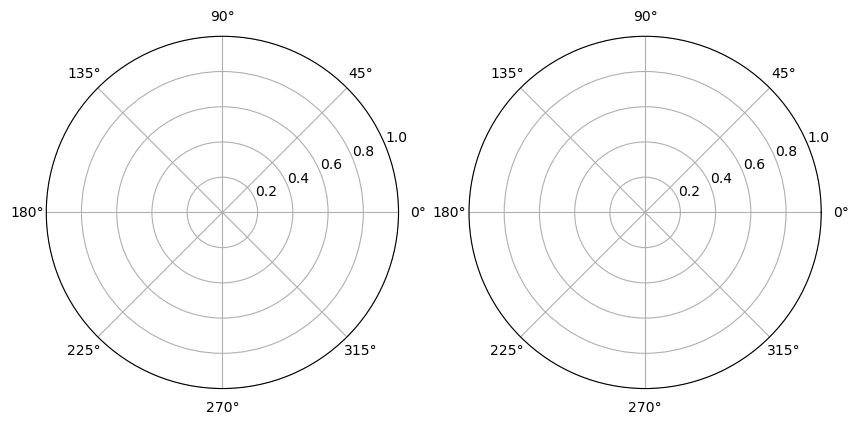

In [4]:
# Grafico radar por categorias 
# ESTRUCTURA:
#### DEFINO FIGURA
plt.figure(figsize= (10, 5))

#### PRIMER GRAFICO
plt.subplot(1, 2, 1,polar=True)

#### SEGUNDO GRAFICO
plt.subplot(1, 2, 2,polar=True)

In [ ]:


# Primero: Genero variables booleanas de interes 
df['Es_chico'] = df['Age'] <= 15
df['Es_Clase_1'] = df['Pclass'] == 1
df['Es_Clase_2'] = df['Pclass'] == 2
df['Es_Clase_3'] = df['Pclass'] == 3
df['Es_Mujer'] = df['Sex'] == 'female'


In [ ]:
# Segundo: Genero el group by para calcular mis metricas
valores_agrupados = df.groupby('Survived')[['Es_chico','Es_Clase_1','Es_Clase_2','Es_Clase_3',
                                            'Es_Mujer']].mean().reset_index()

print(valores_agrupados.head())

In [ ]:
# Tercero: Melteo el group by 
df_melted = pd.melt(valores_agrupados, 
                    id_vars = ['Survived'], 
                    var_name = 'Caracteristica', 
                    value_name = 'Valor')

df_melted = pd.DataFrame(df_melted)
print(df_melted.head())


In [ ]:
plt.figure(figsize= (10, 5))

#### PRIMER GRAFICO

plt.subplot(1, 2, 1,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 1,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,label='Sobrevivientes',color = '#9ECF52')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#9ECF52')

# Ajustar el diseño de la figura
plt.tight_layout()


#### SEGUNDO GRAFICO
plt.subplot(1, 2, 1,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 0,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,label='No Sobrevivientes',color = '#CF5852')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#CF5852')

# Ajustar el diseño de la figura
plt.tight_layout()

# Muestro legendas
plt.legend()

In [ ]:
plt.figure(figsize= (10, 5))

#### PRIMER GRAFICO

plt.subplot(1, 2, 1,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 1,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,color = '#9ECF52')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#9ECF52')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.title('Sobrevivientes',size=20)


#### SEGUNDO GRAFICO
plt.subplot(1, 2, 2,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 0,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,color = '#CF5852')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#CF5852')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.title('No sobrevivientes',size=20)

radar